In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

In [2]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)


In [3]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(w, x[i]) + b
    return f_wb


In [4]:
def compute_cost(x, y, w, b): 
    m = x.shape[0]
    cost_sum = 0 
    for i in range(m): 
        f_wb = np.dot(w, x[i]) + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost


In [5]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw =np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db


In [6]:
def gradient_descent(X, y, alpha=1e-2, num_iters=10000, compute_cost=compute_cost, compute_gradient=compute_gradient):
    J_history = []
    p_history = []
    w = X.shape[1]
    b = 0.
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(compute_cost(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration: {i:8d} | Cost: {J_history[-1][0]:10.4f} | dw: {dj_dw[0]:10.3f} | db: {dj_db[0]:10.3f} | w: {w[0]:8.3f}, | b: {b[0]:8.3f}")

    print(f"\n(w,b) found by gradient descent: ({w}, {b[0]})")

    return w, b, J_history, p_history


In [7]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)


In [8]:
w_final, b_final, J_history, p_history = gradient_descent(X, y)


Iteration:        0 | Cost:  1553.5382 | dw:  -1691.000 | db:   -115.000 | w:   17.910, | b:    1.150
Iteration:     1000 | Cost:   440.9484 | dw:     -0.081 | db:      1.047 | w:   18.699, | b:  -52.099
Iteration:     2000 | Cost:   438.9096 | dw:     -0.006 | db:      0.072 | w:   18.979, | b:  -55.733
Iteration:     3000 | Cost:   438.9000 | dw:     -0.000 | db:      0.005 | w:   18.999, | b:  -55.982
Iteration:     4000 | Cost:   438.9000 | dw:     -0.000 | db:      0.000 | w:   19.000, | b:  -55.999
Iteration:     5000 | Cost:   438.9000 | dw:     -0.000 | db:      0.000 | w:   19.000, | b:  -56.000
Iteration:     6000 | Cost:   438.9000 | dw:     -0.000 | db:      0.000 | w:   19.000, | b:  -56.000
Iteration:     7000 | Cost:   438.9000 | dw:     -0.000 | db:      0.000 | w:   19.000, | b:  -56.000
Iteration:     8000 | Cost:   438.9000 | dw:     -0.000 | db:      0.000 | w:   19.000, | b:  -56.000
Iteration:     9000 | Cost:   438.9000 | dw:     -0.000 | db:      0.000 | w:   19

In [9]:
w_final, b_final

(array([19.]), array([-56.]))

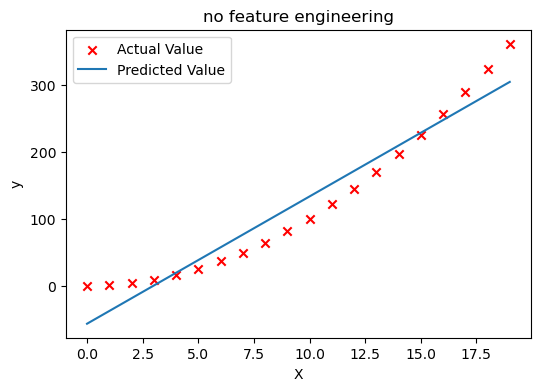

In [10]:
plt.subplots(figsize=(6,4))
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x,X@w_final + b_final, label="Predicted Value")
plt.title("no feature engineering")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [11]:
x = np.arange(0, 20, 1)
y = 1 + x**2

X = x**2
X = X.reshape(-1, 1)


In [12]:
w_final, b_final, J_history, p_history = gradient_descent(X, y, alpha=1e-5)


Iteration:        0 | Cost:     0.3689 | dw:   -123.500 | db:     -1.000 | w:    1.001, | b:    0.000
Iteration:     1000 | Cost:     0.2268 | dw:      0.002 | db:     -0.456 | w:    1.004, | b:    0.005
Iteration:     2000 | Cost:     0.2248 | dw:      0.002 | db:     -0.454 | w:    1.004, | b:    0.009
Iteration:     3000 | Cost:     0.2227 | dw:      0.002 | db:     -0.452 | w:    1.004, | b:    0.014
Iteration:     4000 | Cost:     0.2207 | dw:      0.002 | db:     -0.450 | w:    1.004, | b:    0.018
Iteration:     5000 | Cost:     0.2187 | dw:      0.002 | db:     -0.447 | w:    1.004, | b:    0.023
Iteration:     6000 | Cost:     0.2167 | dw:      0.002 | db:     -0.445 | w:    1.004, | b:    0.027
Iteration:     7000 | Cost:     0.2147 | dw:      0.002 | db:     -0.443 | w:    1.004, | b:    0.032
Iteration:     8000 | Cost:     0.2127 | dw:      0.002 | db:     -0.441 | w:    1.004, | b:    0.036
Iteration:     9000 | Cost:     0.2108 | dw:      0.002 | db:     -0.439 | w:    1

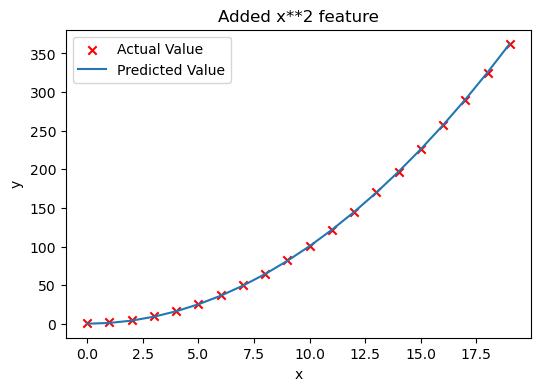

In [13]:
plt.subplots(figsize=(6,4))
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x,X@w_final + b_final, label="Predicted Value")
plt.title("Added x**2 feature")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.show()


In [14]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]


In [15]:
X, X_mu, X_sigma  = zscore_normalize_features(X)


In [16]:
w_final, b_final, J_history, p_history = gradient_descent(X, y)
w_final = w_final.reshape(-1,1)


Iteration:        0 | Cost: 12618.9677 | dw:   -106.559 | db:   -123.500 | w:    4.066, | b:    1.235
Iteration:     1000 | Cost:     6.4543 | dw:      0.374 | db:     -0.005 | w:   32.153, | b:  123.495
Iteration:     2000 | Cost:     5.3974 | dw:      0.174 | db:     -0.000 | w:   29.556, | b:  123.500
Iteration:     3000 | Cost:     5.1089 | dw:      0.093 | db:     -0.000 | w:   28.282, | b:  123.500
Iteration:     4000 | Cost:     4.9511 | dw:      0.059 | db:     -0.000 | w:   27.549, | b:  123.500
Iteration:     5000 | Cost:     4.8179 | dw:      0.045 | db:     -0.000 | w:   27.040, | b:  123.500
Iteration:     6000 | Cost:     4.6916 | dw:      0.039 | db:     -0.000 | w:   26.625, | b:  123.500
Iteration:     7000 | Cost:     4.5691 | dw:      0.036 | db:     -0.000 | w:   26.251, | b:  123.500
Iteration:     8000 | Cost:     4.4500 | dw:      0.035 | db:     -0.000 | w:   25.896, | b:  123.500
Iteration:     9000 | Cost:     4.3340 | dw:      0.034 | db:     -0.000 | w:   25

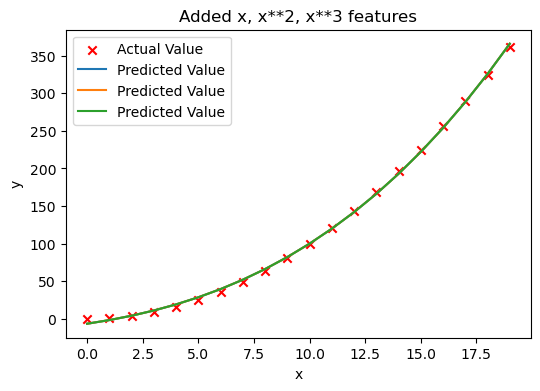

In [17]:
plt.subplots(figsize=(6,4))
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x, X@w_final + b_final, label="Predicted Value")
plt.title("Added x, x**2, x**3 features")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [18]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]


In [19]:
X, X_mu, X_sigma  = zscore_normalize_features(X)


In [20]:
w_final, b_final, J_history, p_history = gradient_descent(X, y, num_iters=1000000, alpha=1e-1)
w_final = w_final.reshape(-1,1)


Iteration:        0 | Cost:  2538.3898 | dw:     13.165 | db:      0.007 | w:   11.683, | b:   -0.001
Iteration:   100000 | Cost:     0.0231 | dw:     -0.000 | db:     -0.000 | w:   -4.329, | b:   -0.007
Iteration:   200000 | Cost:     0.0183 | dw:     -0.000 | db:      0.000 | w:   -3.848, | b:   -0.007
Iteration:   300000 | Cost:     0.0148 | dw:     -0.000 | db:     -0.000 | w:   -3.413, | b:   -0.007
Iteration:   400000 | Cost:     0.0121 | dw:     -0.000 | db:     -0.000 | w:   -3.036, | b:   -0.007
Iteration:   500000 | Cost:     0.0101 | dw:     -0.000 | db:     -0.000 | w:   -2.708, | b:   -0.007
Iteration:   600000 | Cost:     0.0086 | dw:     -0.000 | db:     -0.000 | w:   -2.423, | b:   -0.007
Iteration:   700000 | Cost:     0.0074 | dw:     -0.000 | db:      0.000 | w:   -2.175, | b:   -0.007
Iteration:   800000 | Cost:     0.0066 | dw:     -0.000 | db:     -0.000 | w:   -1.960, | b:   -0.007
Iteration:   900000 | Cost:     0.0059 | dw:     -0.000 | db:      0.000 | w:   -1

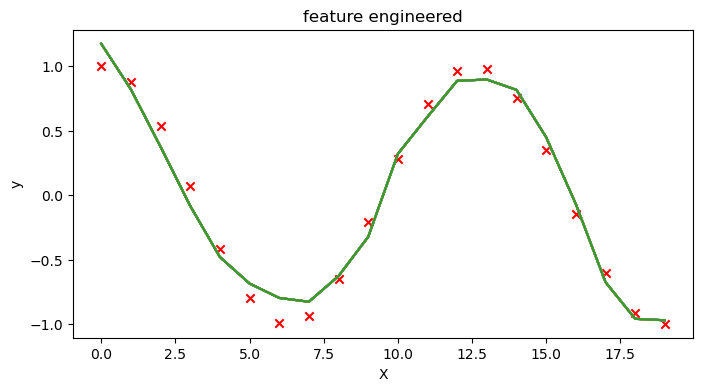

In [21]:
plt.figure(figsize=(8,4))
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x, X@w_final + b_final, label="Predicted Value")
plt.title("feature engineered")
plt.xlabel("X")
plt.ylabel("y")
# plt.legend()
plt.show()
